# Analysis of the risk of failure of the O-rings on the Challenger shuttle

On January 27, 1986, the day before the takeoff of the shuttle _Challenger_, had
a three-hour teleconference was held between 
Morton Thiokol (the manufacturer of one of the engines) and NASA. The
discussion focused on the consequences of the
temperature at take-off of 31°F (just below
0°C) for the success of the flight and in particular on the performance of the
O-rings used in the engines. Indeed, no test
had been performed at this temperature.

The following study takes up some of the analyses carried out that
night with the objective of assessing the potential influence of
the temperature and pressure to which the O-rings are subjected
on their probability of malfunction. Our starting point is 
the results of the experiments carried out by NASA engineers
during the six years preceding the launch of the shuttle
Challenger.

## Loading the data
We start by loading this data:

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("shuttle.csv")
data

,Date,Count,Temperature,Pressure,Malfunction
0,4/12/81,6,66,50,0
1,11/12/81,6,70,50,1
2,3/22/82,6,69,50,0
3,11/11/82,6,68,50,0
4,4/04/83,6,67,50,0
5,6/18/82,6,72,50,0
6,8/30/83,6,73,100,0
7,11/28/83,6,70,100,0
8,2/03/84,6,57,200,1
9,4/06/84,6,63,200,1


The data set shows us the date of each test, the number of O-rings (there are 6 on the main launcher), the temperature (in Fahrenheit) and pressure (in psi), and finally the number of identified malfunctions.

## Graphical inspection
Flights without incidents do not provide any information
on the influence of temperature or pressure on malfunction.
We thus focus on the experiments in which at least one O-ring
was defective.

**Correction**: Flights without incidents can provide us important informations about the conditions that allow the flights happen correctly. Thus, we must keep these rows.

In [ ]:
##data = data[data.Malfunction>0]
##data

We have a high temperature variability but
the pressure is almost always 200, which should
simplify the analysis.

How does the frequency of failure vary with temperature?

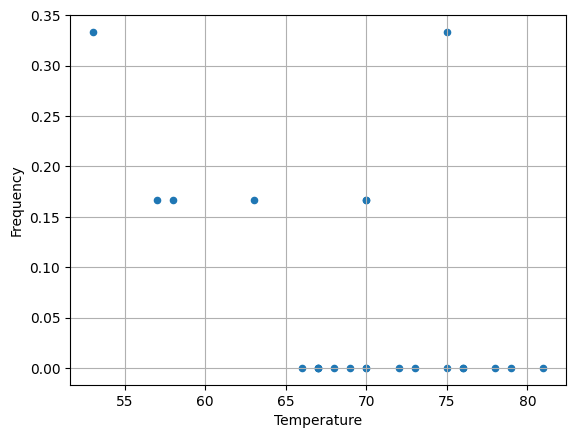

In [7]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data["Frequency"]=data.Malfunction/data.Count
data.plot(x="Temperature",y="Frequency",kind="scatter")
plt.grid(True)

This graph allows us to represent the relation between the temperature and the frequency of failures. At first glance, it seems that for higher temperatures, it is most likely to have less failures, but we must check it more deeply, using a statistical model.

## Estimation of the temperature influence

Suppose that each of the six O-rings is damaged with the same
probability and independently of the others and that this probability
depends only on the temperature. If $p(t)$ is this probability, the
number $D$ of malfunctioning O-rings during a flight at
temperature $t$ follows a binomial law with parameters $n=6$ and
$p=p(t)$. To link $p(t)$ to $t$, we will therefore perform a
logistic regression.

In [8]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], family=sm.families.Binomial(sm.families.links.Logit())).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                   23
Model:                            GLM   Df Residuals:                       21
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.9210
Date:                Wed, 05 Feb 2025   Deviance:                       3.0144
Time:                        16:59:31   Pearson chi2:                     5.00
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04355
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0850      7.477      0.680      0.496      -9.570      19.740
Temperature    -0.1156      0.115     -1.004      0.316      -0.341       0.110
===============================================================================
"""

Using a Generalized Linear Model, although the coeficient of the temperature **-0.1156** corroborates with our hypothesis that for lower temperatures, higher the frequency of failures, the P-value **0.316** indicates that this is not statistically relevant. Hence, we can't say that this is a precise analysis.

## Estimation of the probability of O-ring malfunction

The expected temperature on the take-off day is 31°F. Let's try to
estimate the probability of O-ring malfunction at
this temperature from the model we just built:

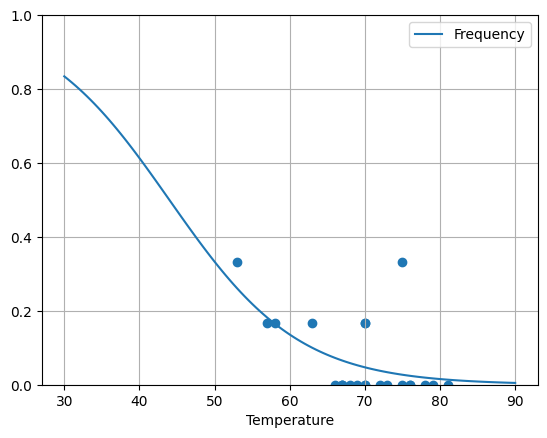

In [9]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred[['Intercept','Temperature']])
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

### Confidence Interval
Let's calculate the confidence interval so we estimate the certainty of the results above

In [13]:
logmodel.conf_int()

,0,1
Intercept,-9.569730,19.739685
Temperature,-0.341358,0.110156


The confidence interval for temperature **[-0.341358, 0.110156]** suggests that the temperature's effect can be positive, negative or even none. This information, along with the large width of the confidence interval, indicates one more time that this analysis is not enough to take some decision

### Conclusion:
The analysis made is not enough to take a decision whether is safe or not launching the shuttle Challenger. Thus, I suggest not to launch it.

It needs to make some more reliable analysis or even collect more data, in order to have more certainty and so a safer launch.